# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem : predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

### Hyperparameters :

* Input Layer Shape
* Hidden Layer Shape
* Neurons per hidden layer
* Output layer shape
* Hidden activation
* Output activation
* Loss function
* Optimizer

In [3]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## Create some data to view and fit

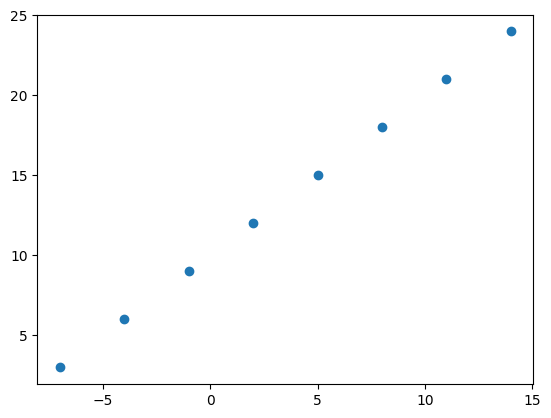

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0,18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([937000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937000])>)

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X[1], y[1]

(-4.0, 6.0)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [10]:
X[0].ndim

0

In [11]:
X[0], y[0]

(-7.0, 3.0)

In [12]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

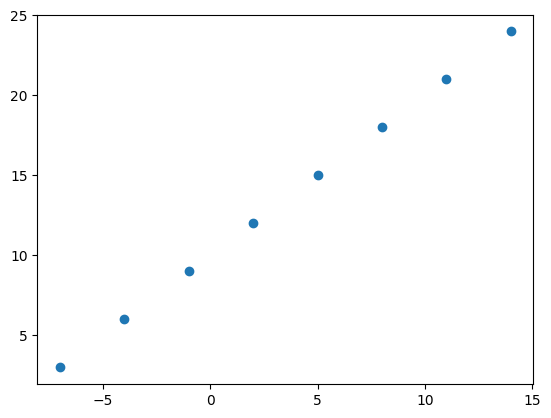

In [14]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words the functionn which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels) 

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"]) 

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step - loss: 17.4098 - mae: 17.4098
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 17.1285 - mae: 17.1285
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 16.8473 - mae: 16.8473
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 16.5660 - mae: 16.5660
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 16.2848 - mae: 16.2848


In [16]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([[17.0]], dtype=np.float32))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[-10.588863]], dtype=float32)

In [18]:
y_pred + 11

array([[0.41113663]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** -  Here we might change the loss function, optimizer, metrics, or perhaps the **learning rate** of the said optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)



### Common ways to improve a deep model:

* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate (most important)
* Fitting on more data
* Fitting for longer


In [19]:
# Lets's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - loss: 12.0186 - mae: 12.0186
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.8861 - mae: 11.8861
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.7536 - mae: 11.7536
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.6211 - mae: 11.6211
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.4886 - mae: 11.4886
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.3561 - mae: 11.3561
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.2236 - mae: 11.2236
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.0911 - mae: 11.0911
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.9586 - mae: 10.9586
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.8261 - mae: 10.8261
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.6936 - mae: 10.6936
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.5611 - mae: 10.5611
Epoch 13/100
1/1 ━━━━━━━

In [20]:
# Data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Let's see if our model's prediction has improved 
model.predict(np.array([[17.0]], dtype=np.float32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[30.052725]], dtype=float32)

In [22]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"]) 

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step - loss: 12.5702 - mae: 12.5702
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.7244 - mae: 11.7244
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.8925 - mae: 10.8925
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.0711 - mae: 10.0711
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 9.2405 - mae: 9.2405
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.3876 - mae: 8.3876
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.6769 - mae: 7.6769
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.9730 - mae: 6.9730
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.2338 - mae: 6.2338
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.4573 - mae: 5.4573
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.6441 - mae: 4.6441
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.9839 - mae: 3.9839
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [23]:
model.predict(np.array([[17.0]], dtype=np.float32))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[26.716022]], dtype=float32)

## Evaluating a model

In practice, a typical workflow we'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ... 
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize and visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like 
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [24]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [25]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

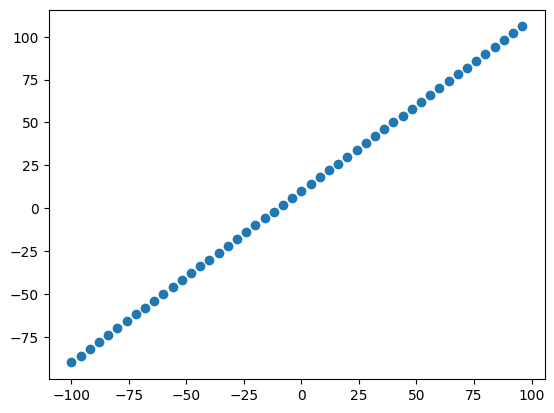

In [26]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available
* **Validation set** - the model gets tuned on this dataset, which is typically 10-15% of the data available 
* **Test set** - the model gets evaluated on this data to test what is learned, this set is typically 10-15% of the total data available.

In [27]:
# Check the length of how many samples we have
len(X)

50

In [28]:
# Split the data into train and test sets
X_train = X[:40] # first 40 examples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

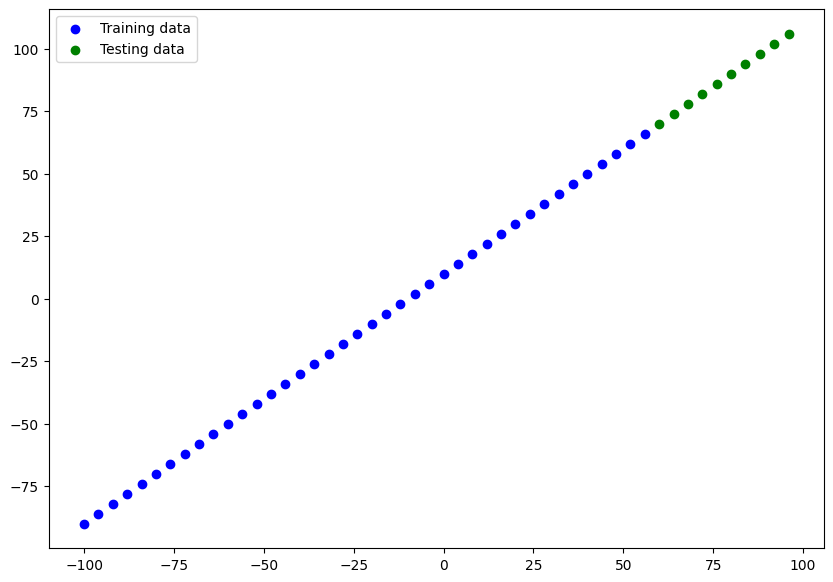

In [29]:
plt.figure(figsize=(10, 7))
# Plot the training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

# Show a legend
plt.legend();

In [30]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [33]:
# Let's create a model which builds automatically by defining the input shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (Same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model (Same as above)
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]) 



C:\Users\agarw\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total param - total number of parameters
* Trainable parameters - these are the parameters (patterns) the mode can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns parameters from other models during **transfer learning**).

In [35]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [36]:
# Get a summmary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

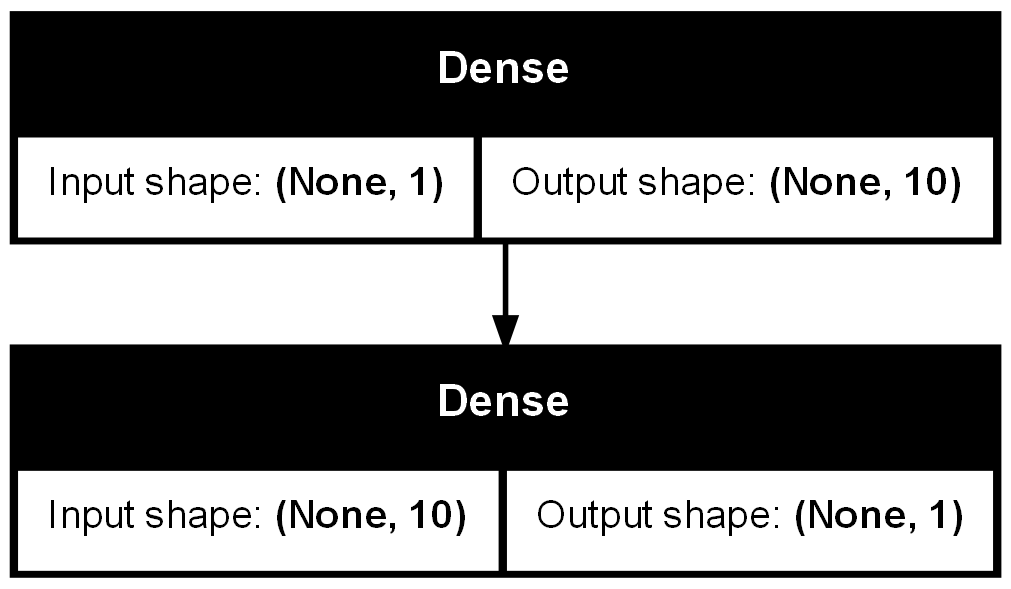

In [37]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions 

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often we'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [38]:
# Make some predictions 
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[33.94449 ],
       [36.104717],
       [38.264942],
       [40.42517 ],
       [42.585396],
       [44.745625],
       [46.90585 ],
       [49.06608 ],
       [51.2263  ],
       [53.386528]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [40]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predicitions to ground truth labels.
  """

  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Test data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show legend
  plt.legend();

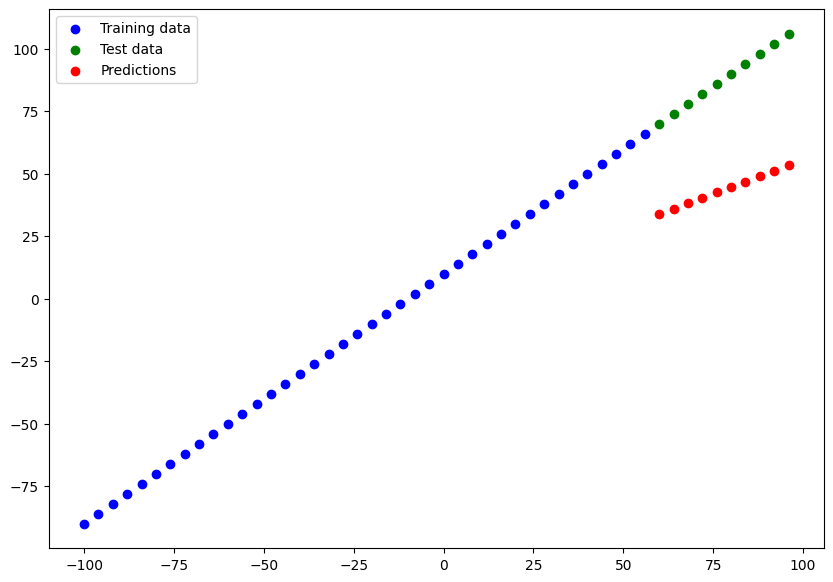

In [41]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem, there will be different metrics to evaluate model's performance

For regression :
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

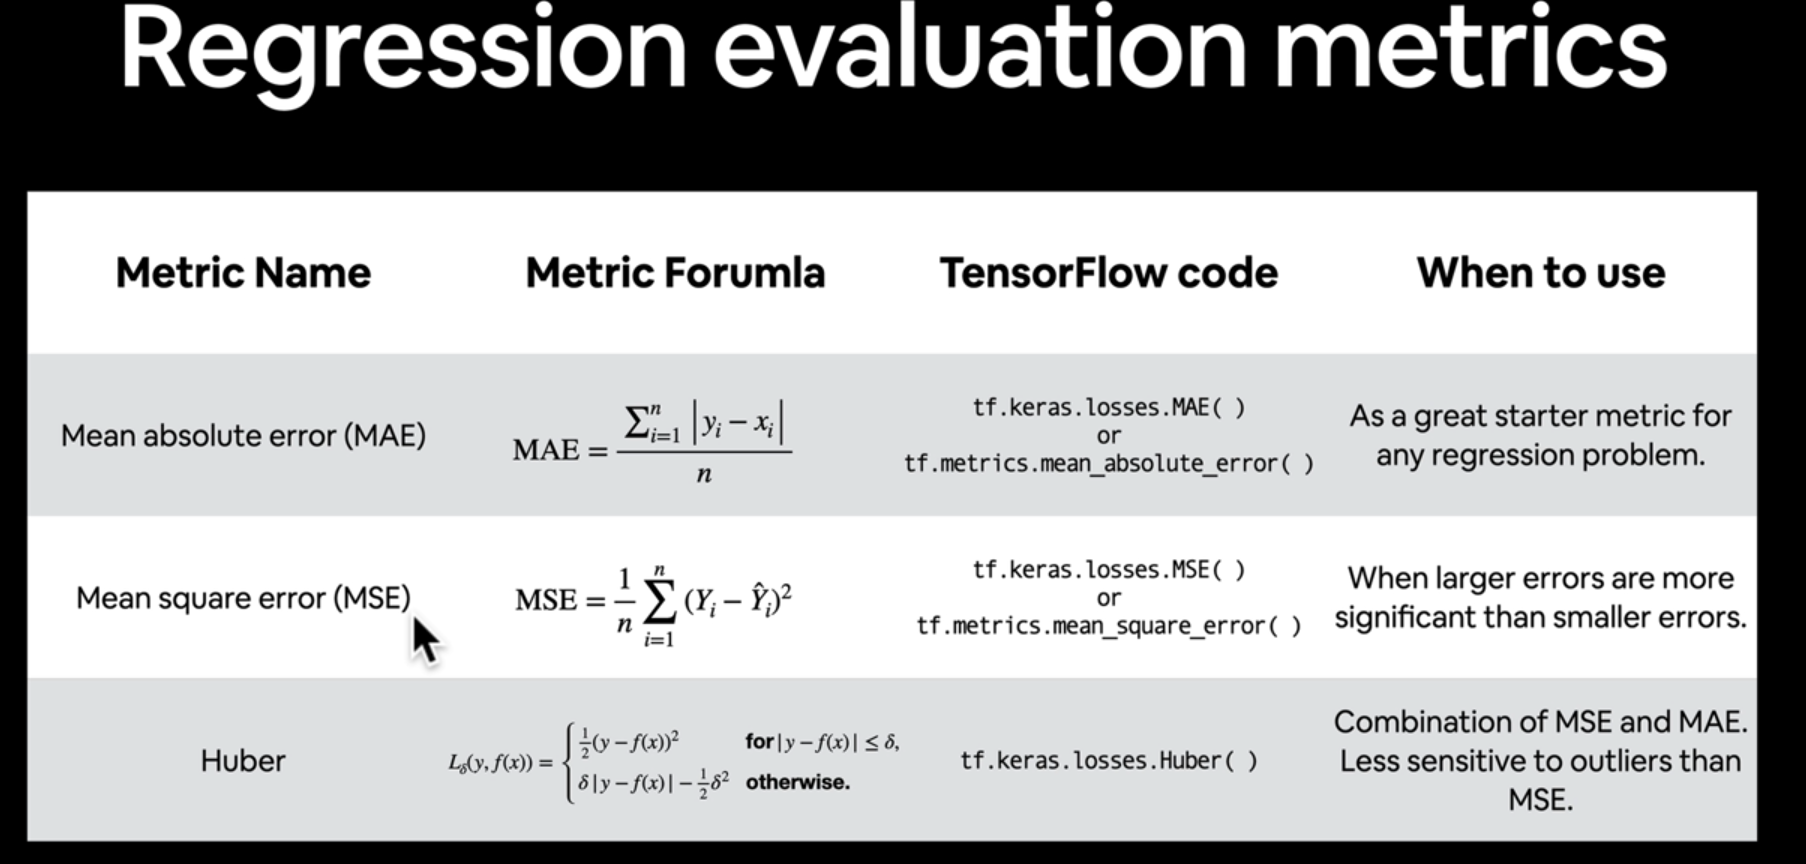

In [42]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 44.3345 - mae: 44.3345


[44.33449172973633, 44.33449172973633]

In [43]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_test, tf.constant(y_pred))
mae


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([36.05551 , 37.895283, 39.735058, 41.57483 , 43.414604, 45.254375,
       47.09415 , 48.93392 , 50.7737  , 52.613472], dtype=float32)>

In [44]:
y_pred

array([[33.94449 ],
       [36.104717],
       [38.264942],
       [40.42517 ],
       [42.585396],
       [44.745625],
       [46.90585 ],
       [49.06608 ],
       [51.2263  ],
       [53.386528]], dtype=float32)

In [45]:
y_pred

array([[33.94449 ],
       [36.104717],
       [38.264942],
       [40.42517 ],
       [42.585396],
       [44.745625],
       [46.90585 ],
       [49.06608 ],
       [51.2263  ],
       [53.386528]], dtype=float32)

In [46]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [47]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33.94449 , 36.104717, 38.264942, 40.42517 , 42.585396, 44.745625,
       46.90585 , 49.06608 , 51.2263  , 53.386528], dtype=float32)>

In [48]:
# Calculate the mean absolute error 
mae = tf.keras.losses.MeanAbsoluteError()
mae_value = mae(y_test, y_pred)
mae_value

<tf.Tensor: shape=(), dtype=float32, numpy=44.33449172973633>

In [49]:
# Calculate the mean square error
mse = tf.keras.losses.MSE(y_true=y_test,
                      y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1993.471435546875>

In [50]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.keras.losses.MAE(y_true=y_true,
                               y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.keras.losses.MSE(y_true=y_true,
                               y_pred=tf.squeeze(y_pred))

### Running experiments to improve model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

1. Get more data - get more examples for model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in form of more layers or more hidden units in each layer
3. Train for longer - give your model more of a chance to find patterns in the data.

3 model experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

** Build `model_1`

In [51]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])  

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.reshape(X_train, [-1, 1]), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.6875 - mae: 32.6875  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5723 - mae: 8.5723 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.0411 - mae: 10.0411 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.7400 - mae: 11.7400 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.6821 - mae: 8.6821 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.1508 - mae: 10.1508 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.8856 - mae: 11.8856 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.7918 - mae: 8.7918 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.2606 - mae: 10.2606 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.0530 - mae: 12.0530 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 12.5579 - mae: 12.5579  
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9785 - mae: 7.9785 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


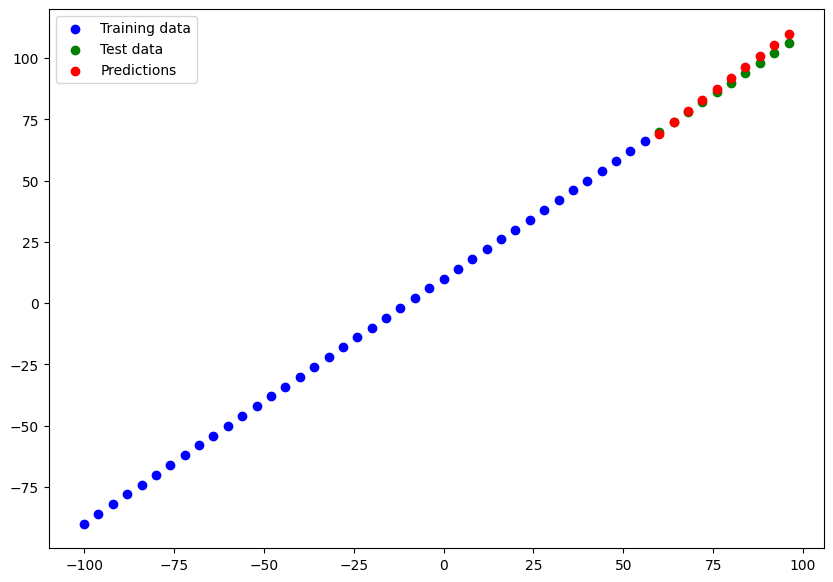

In [52]:
# Make a plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [53]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 69.21679],
        [ 73.73774],
        [ 78.25869],
        [ 82.77964],
        [ 87.3006 ],
        [ 91.82155],
        [ 96.3425 ],
        [100.86346],
        [105.38441],
        [109.90536]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 69.21679,  73.73774,  78.25869,  82.77964,  87.3006 ,  91.82155,
         96.3425 , 100.86346, 105.38441, 109.90536], dtype=float32)>)

In [54]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.7701667547225952>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.675926685333252>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [55]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.reshape(X_train, [-1, 1]), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 40.9780 - mse: 2351.5103  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.2195 - mse: 1008.6860 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.0675 - mse: 856.0911 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.2792 - mse: 345.8486 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.3766 - mse: 501.8374 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.6775 - mse: 280.1324 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.8374 - mse: 309.4453 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.5506 - mse: 329.2692 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.5609 - mse: 212.8841 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 14.3964 - mse: 287.2483  
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.0197 - mse: 192.3315
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.8526 - mse: 303.8145 
Epoch 13/10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


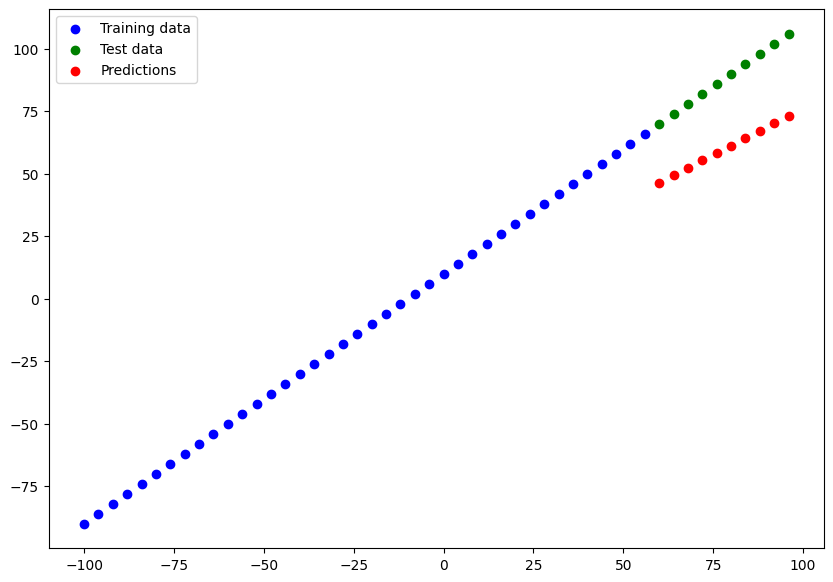

In [56]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [57]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=28.20746421813965>,
 <tf.Tensor: shape=(), dtype=float32, numpy=804.2469482421875>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [58]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_3.fit(tf.reshape(X_train, [-1, 1]), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 21.3511 - mse: 836.4556 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.9738 - mse: 605.7703 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.1361 - mse: 554.6833 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.5219 - mse: 426.0646 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.2264 - mse: 363.3884 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.3360 - mse: 362.1146 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.8257 - mse: 221.4494 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.7178 - mse: 303.1800 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.5985 - mse: 329.5658 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.7286 - mse: 213.4938 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.7036 - mse: 299.8308 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.8373 - mse: 189.8328
Epoch 13/500


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


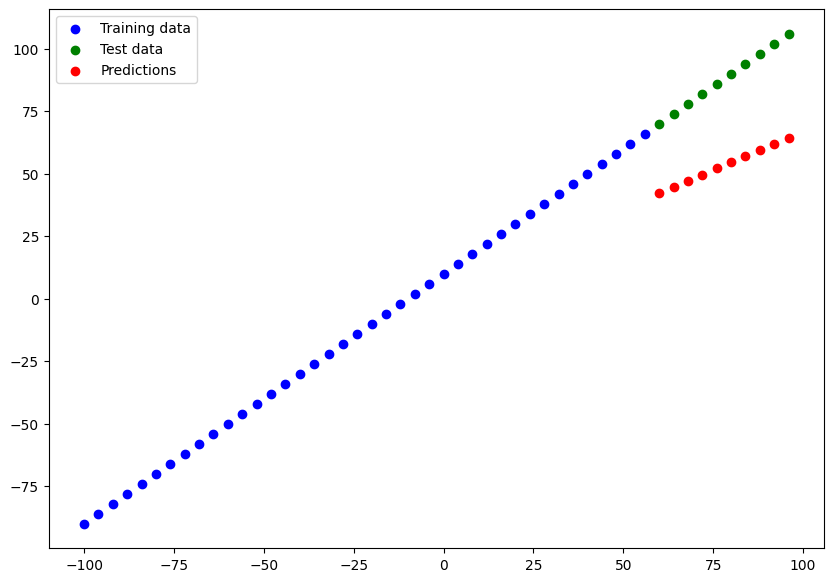

In [59]:
# Make and plot predictions of model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [60]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=34.67729949951172>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1223.3944091796875>)

## Comparing the results of our experiments

In [61]:
# Let's compare the model's results using a pandas DataFrame
import pandas as pd

model_results =[["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,1.770167,4.675927
1,model_2,28.207464,804.246948
2,model_3,34.677299,1223.394409


In [62]:
model_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Tracking Experiments

One really good habit in machine learning modelling is to track the results of experiments.

And doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help!

For more models :

* TensorBoard - a component of the TensorFlow library to help track modelling experiments
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard) 

## Saving our models

Saving our models allows us to use them outside of the notebook such as in a web application or a mobile app

There are two main formats we can save our models too:

1. The save model format
2. The HDF5 format

In [63]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format.tf")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=best_model_SavedModel_format.tf.

In [65]:
# Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model(r"C:\Users\agarw\OneDrive\Desktop\Rohan\Tensorflow\Neural Network Regression\best_model_SavedModel_format.keras")
loaded_SavedModel_format.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [67]:
model_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [72]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [74]:
# COmpare the MAE of model_2 preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [75]:
model_2_preds.squeeze()

array([46.383236, 49.363083, 52.34293 , 55.32277 , 58.302616, 61.282455,
       64.2623  , 67.24214 , 70.221985, 73.201836], dtype=float32)

In [76]:
loaded_SavedModel_format_preds.squeeze()

array([46.383236, 49.363083, 52.34293 , 55.32277 , 58.302616, 61.282455,
       64.2623  , 67.24214 , 70.221985, 73.201836], dtype=float32)

In [79]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model(r"C:\Users\agarw\OneDrive\Desktop\Rohan\Tensorflow\Neural Network Regression\best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [83]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [85]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
# Read in the insurance dataset
insurance = pd.read_csv(r"https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [93]:
# Try one-hot encode DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [95]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [96]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [97]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [98]:
# Create training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [99]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


In [101]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9922.3643 - mae: 9922.3643     
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 7487.2949 - mae: 7487.2949
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 7229.8281 - mae: 7229.8281
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 7331.0605 - mae: 7331.0605
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 7197.7451 - mae: 7197.7451
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7521.9272 - mae: 7521.9272
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 7871.2710 - mae: 7871.2710
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 7188.8276 - mae: 7188.8276
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 7613.6636 - mae: 7613.6636
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 7649.8906 - mae: 7649.8906
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 7833.5381 - mae: 7833.5381
Epoch 12/100
34/34 ━━━━━━━━━━

In [102]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 8220.8604 - mae: 8220.8604


[8196.814453125, 8196.814453125]

In [105]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now model is not performing too well. Try and improve it

To improve the model, run 2 experiments
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)

In [112]:
# Set random seed
tf.random.set_seed(42)
 
# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13270.0166 - mae: 13270.0166
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 13153.4131 - mae: 13153.4131
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 12900.1367 - mae: 12900.1367
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12362.3779 - mae: 12362.3779 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 11387.2227 - mae: 11387.2227
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 9988.6348 - mae: 9988.6348 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 8526.1191 - mae: 8526.1191
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 7595.1309 - mae: 7595.1309
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 7397.8564 - mae: 7397.8564
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 7364.8062 - mae: 7364.8062
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 7343.9043 - mae: 7343.9043
Epoch 12/100
34/34 ━━━

In [113]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5096.2305 - mae: 5096.2305  


[4943.50390625, 4943.50390625]

In [118]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13239.0957 - mae: 13239.0957   
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 13047.2646 - mae: 13047.2646
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 12669.6396 - mae: 12669.6396
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 11951.2275 - mae: 11951.2275
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 10774.6914 - mae: 10774.6914
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 9312.5723 - mae: 9312.5723
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 8014.9126 - mae: 8014.9126
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 7450.6626 - mae: 7450.6626
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 7370.9839 - mae: 7370.9839
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 7346.3081 - mae: 7346.3081
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 7324.6431 - mae: 7324.6431
Epoch 12/200
34/34 

In [115]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3481.5334 - mae: 3481.5334  


[3415.269287109375, 3415.269287109375]

In [116]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8220.8604 - mae: 8220.8604 


[8196.814453125, 8196.814453125]

Text(0.5, 0, 'epochs')

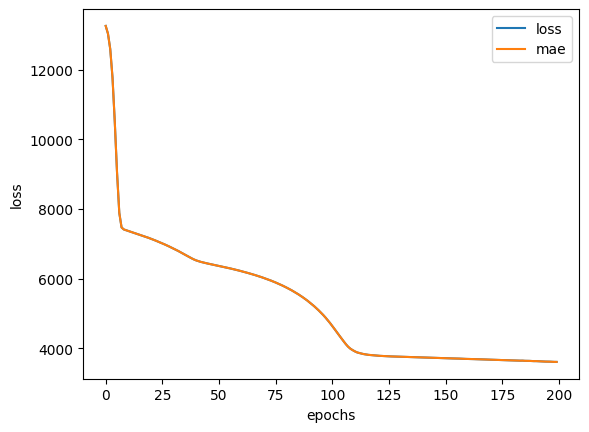

In [119]:
# Plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

EarlyStoppingCallback: It is a TensorFlow component you can add to model to stop training once it stops improving a certain metric

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

In [120]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: ylabel='Frequency'>

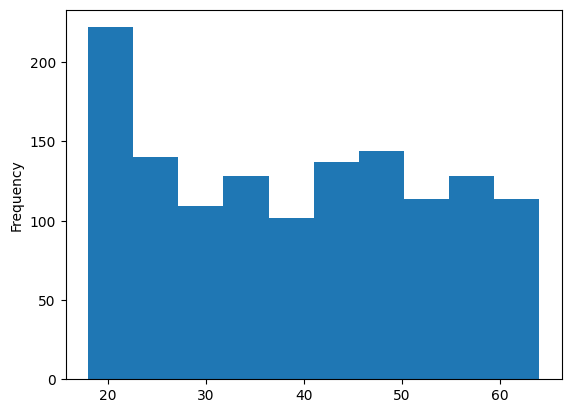

In [122]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

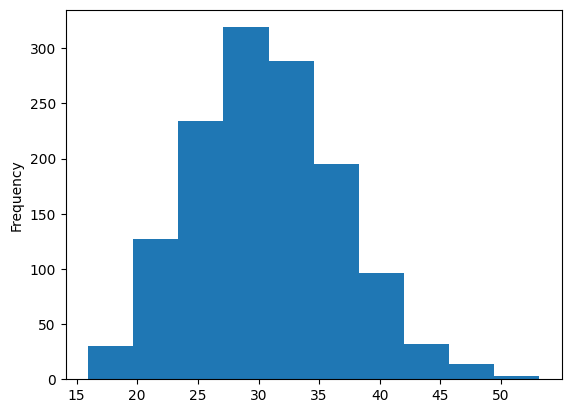

In [123]:
X["bmi"].plot(kind="hist")

In [124]:
X["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance DataFrame
insurance = pd.read_csv(r"https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare data, Scikit-Learn classes can be used

In [136]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values in these columns between 0 and 1    
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)

# Fit the column transformer to training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [137]:
# What does data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [138]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [139]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [145]:
# Build a neural network model to fit 
tf.random.set_seed(42)


# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13297.0254 - mae: 13297.0254
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 13289.0947 - mae: 13289.0947
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 13270.0869 - mae: 13270.0869
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 13228.7100 - mae: 13228.7100
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 13153.2373 - mae: 13153.2373
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 13032.5723 - mae: 13032.5723
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 12856.3047 - mae: 12856.3047
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 12614.4307 - mae: 12614.4307
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 12297.2539 - mae: 12297.2539
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 11898.6758 - mae: 11898.6758
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11426.9287 - mae: 11426.9287 
Epoch 12/10

In [143]:
# Evaluate insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 3518.1333 - mae: 3518.1333


[3432.16845703125, 3432.16845703125]